# Lo(w)ess Regression
**Goal**: This notebook contains an example of how to use the Lo(w)ess Regression.

It also has a function to create images for turning the whole fitting method into a GIF.

In [1]:
# Some basic housekeeping
%load_ext autoreload
%autoreload 2

# Imports
import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklego.linear import LoessRegressor

# Create dummy dataset
Sinewave with a gap in the data.

In [2]:
def random_bound_data(minimum_val, maximum_val, size):
    """
    Generate random data-points of size between bounds.

    :param minimum_val: float, minimal value of the generated data
    :param maximum_val: float, maximum value of the generated data
    :param size: tuple or list, shape of the desired output
    :return: x, y
    """
    return (maximum_val - minimum_val) * np.random.random(size=size) + minimum_val


def generate_noisy_sine_data(noise_std):
    """
    Generate x with a gap and f(x) with added normal distributed noise with standard deviation
    noise_std, with:
    f(x) = 5*sin(x/3) + N(mu=0, sigma=n)

    :param noise_std: non-negative float, standard deviation of added noise.
    :return: xnp.Array, y = f(x) + N(0, std)
    """
    x1 = random_bound_data(10, 30, 100)
    x2 = random_bound_data(40, 60, 100)
    x = np.append(x1, x2)
    np.random.shuffle(x)

    return x, 5 * np.sin(x / 3) + np.random.normal(loc=0, scale=noise_std, size=x.shape)

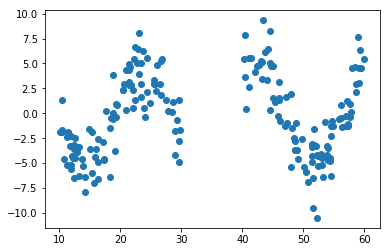

In [3]:
np.random.seed(0)
noise_std=2
xs, ys = generate_noisy_sine_data(noise_std)

plt.scatter(xs,ys)

# Fit and predict using LoesRegressor

In [14]:
model = LoessRegressor(span=0.2,
                       weighting_method='euclidean')

x_preds = np.linspace(xs.min()-5, xs.max()+5, 100)
y_preds, indices = model.fit(xs.reshape(-1, 1),ys).predict(x_preds.reshape(-1, 1), with_indices=True)

# Plot of each window
Takes a long time to run, only run with caution!

/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the p

/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the p

/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the p

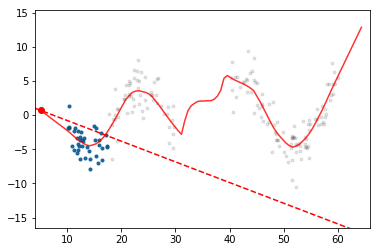

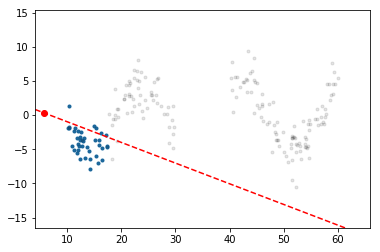

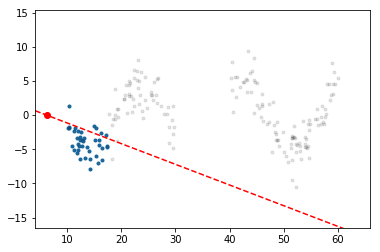

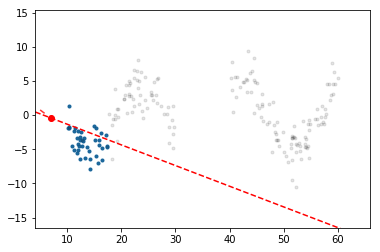

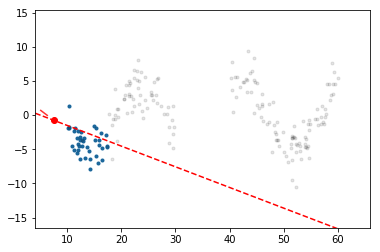

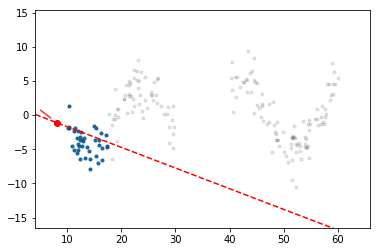

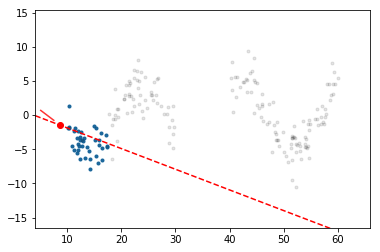

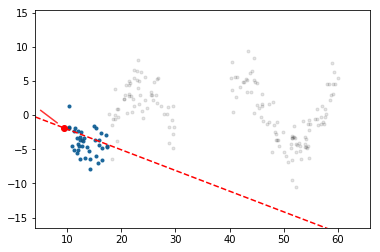

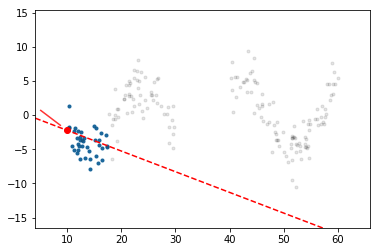

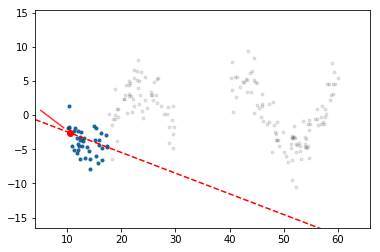

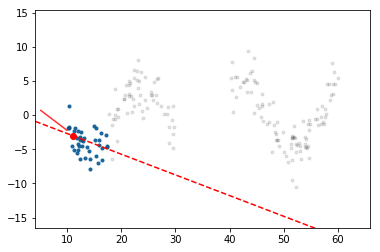

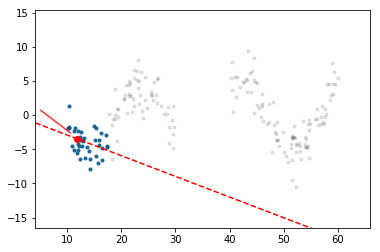

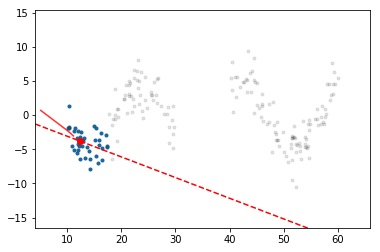

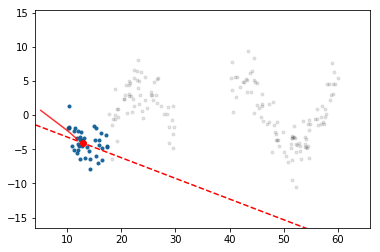

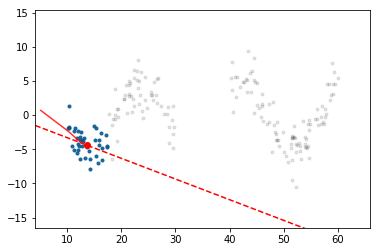

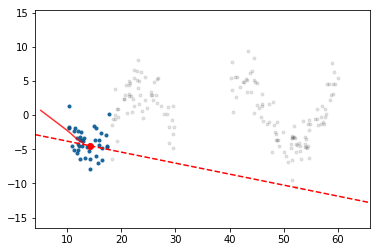

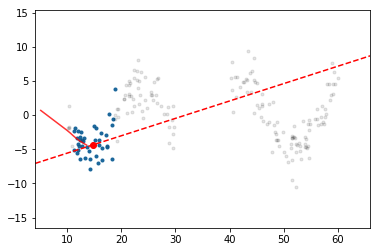

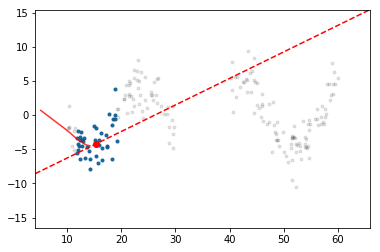

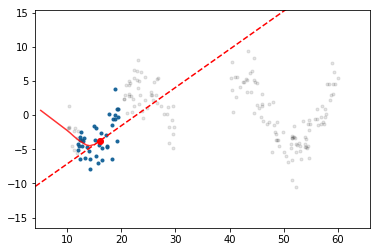

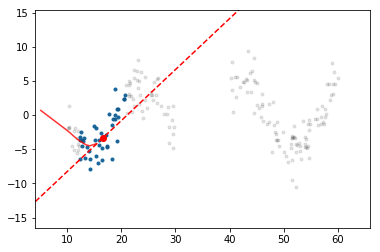

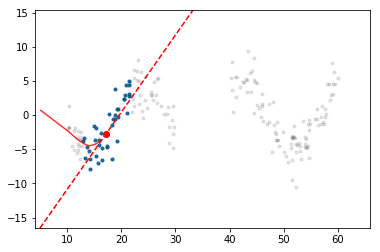

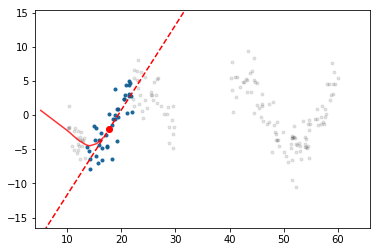

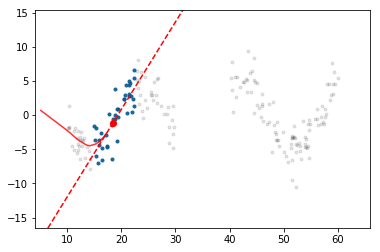

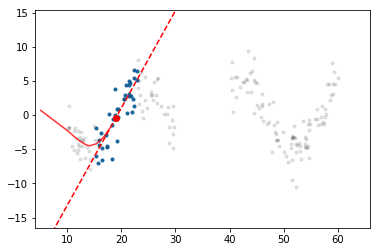

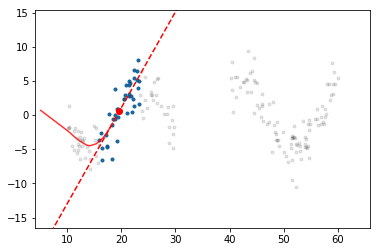

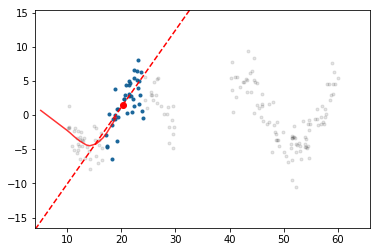

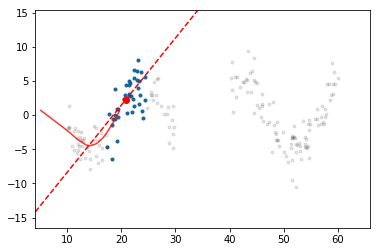

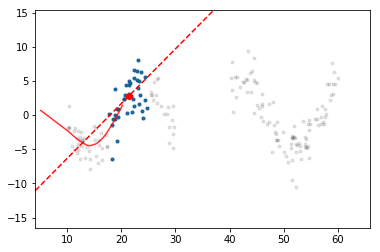

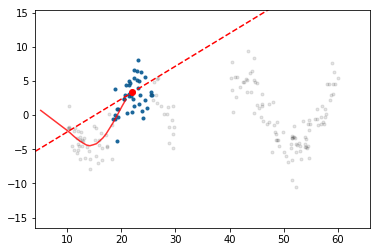

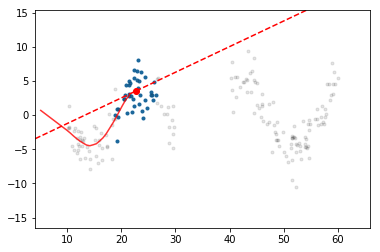

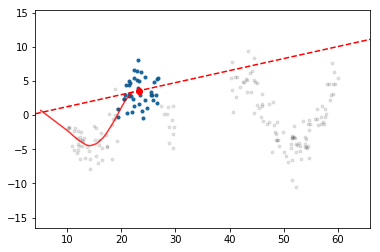

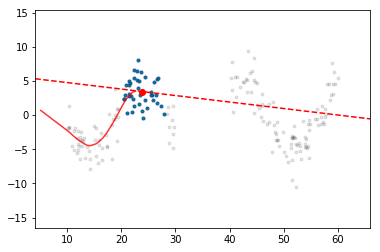

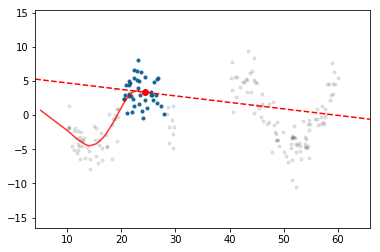

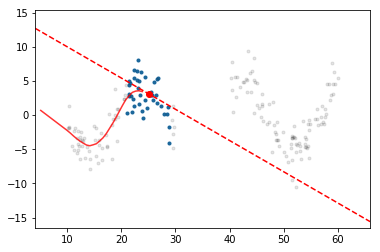

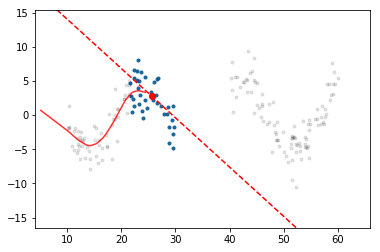

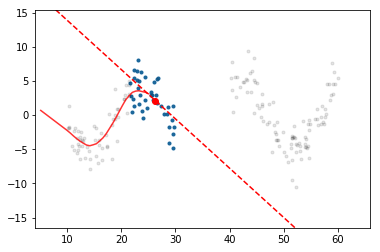

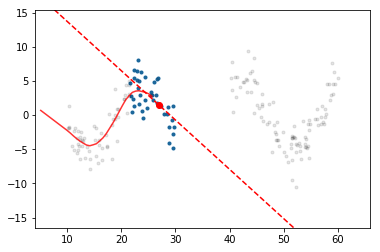

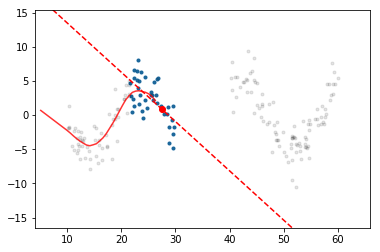

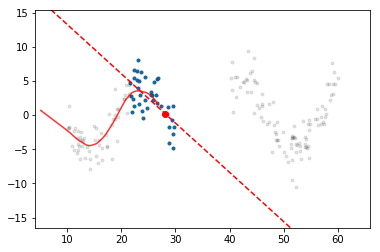

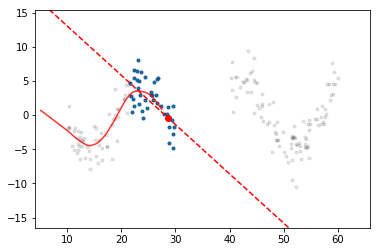

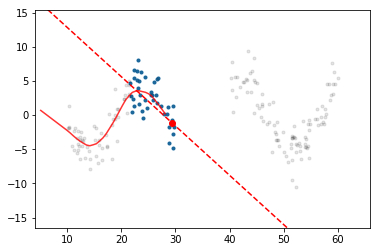

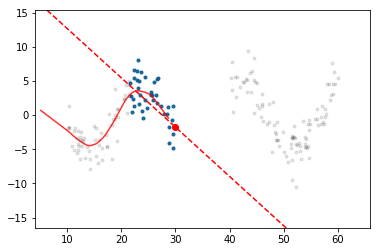

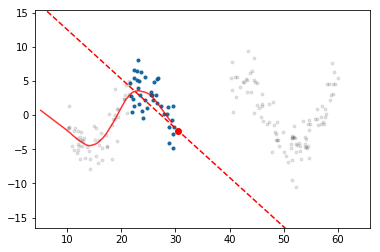

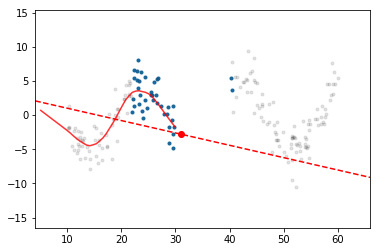

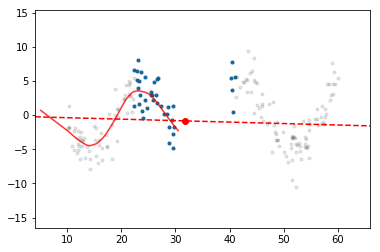

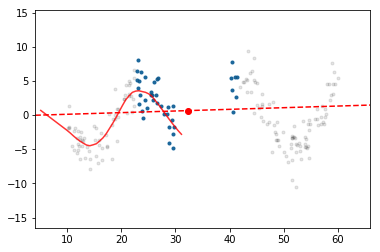

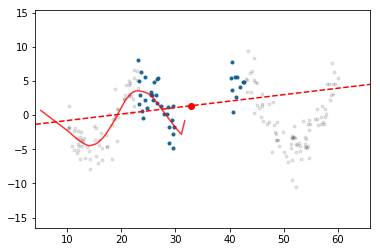

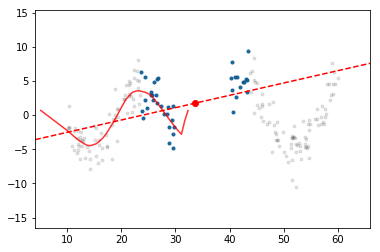

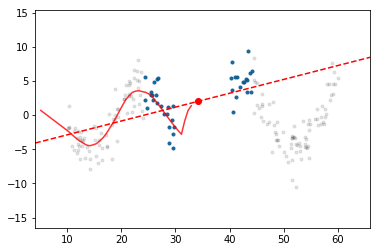

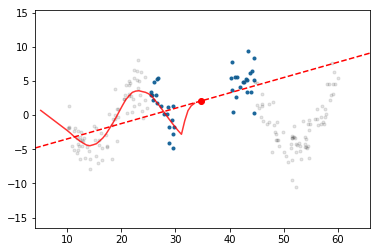

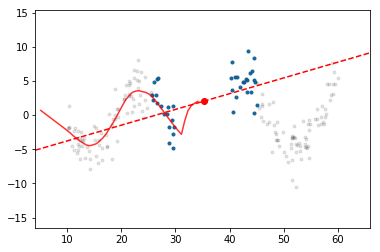

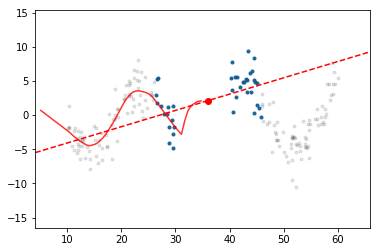

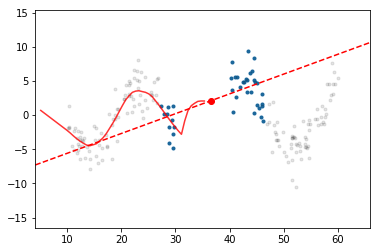

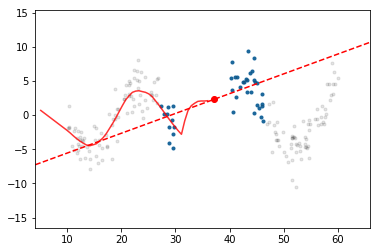

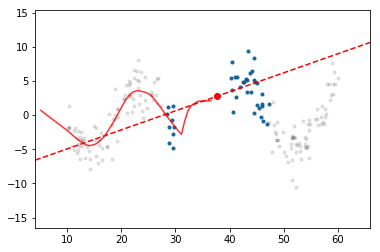

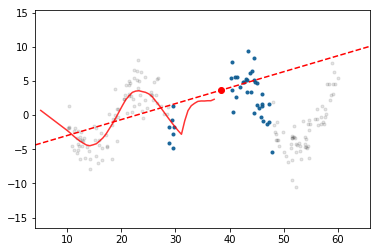

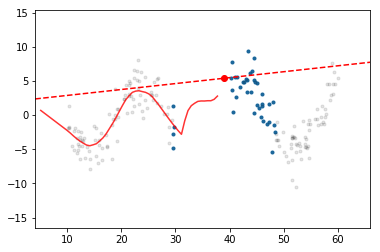

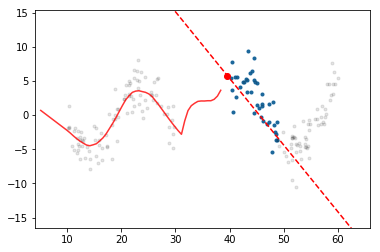

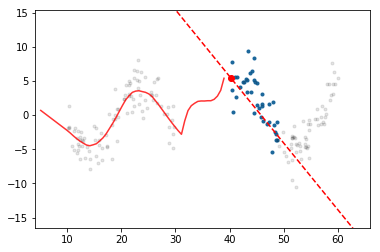

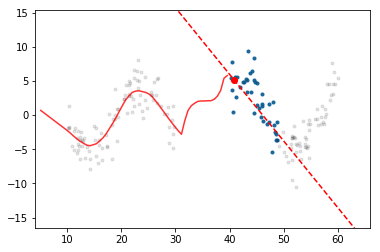

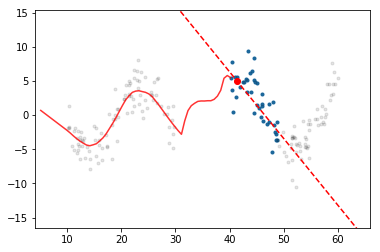

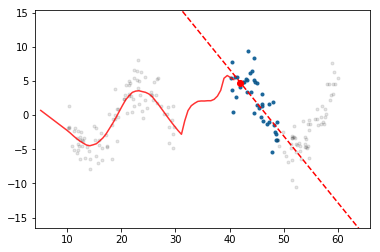

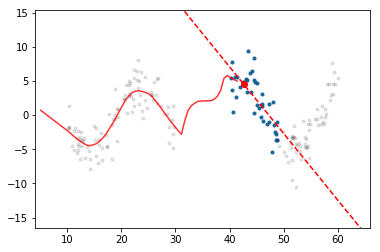

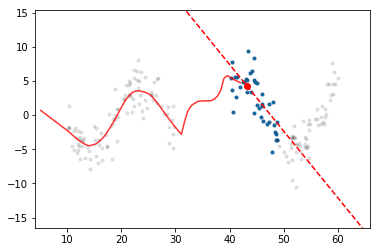

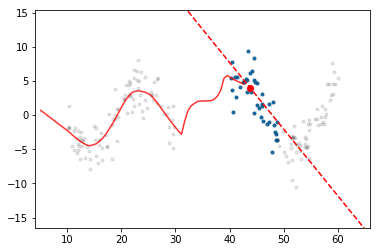

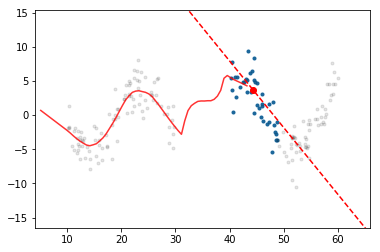

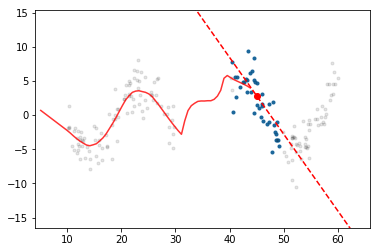

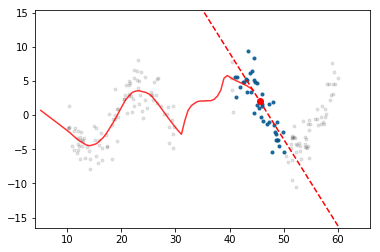

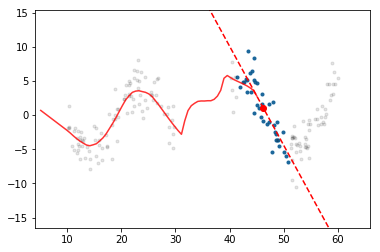

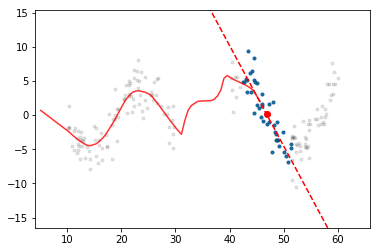

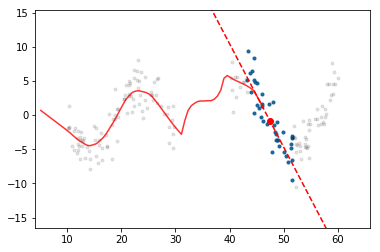

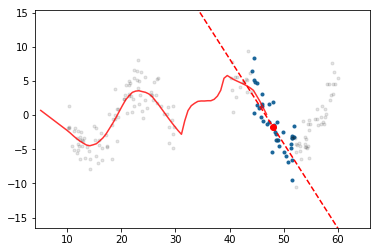

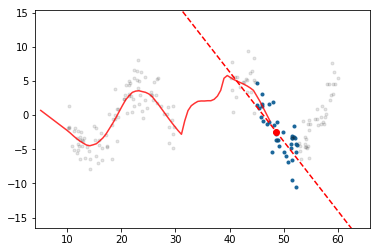

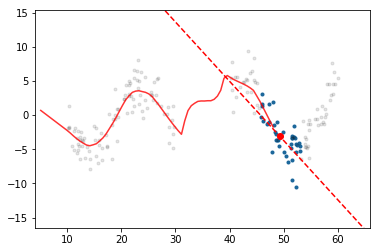

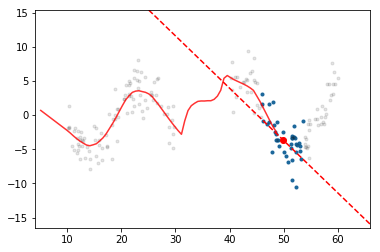

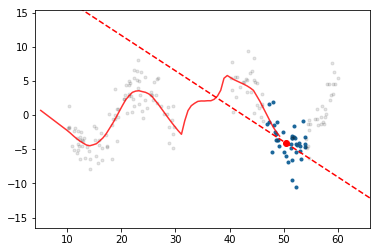

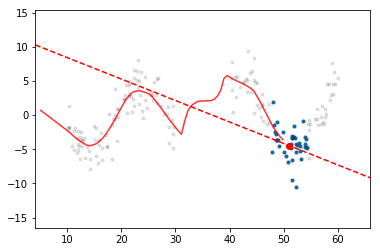

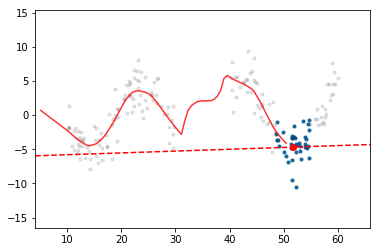

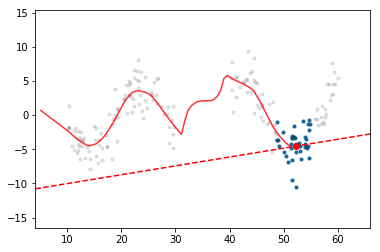

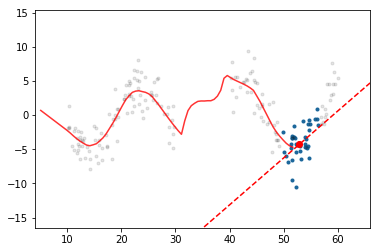

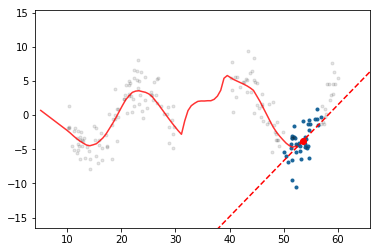

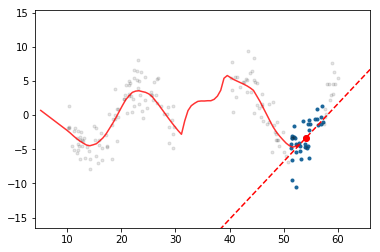

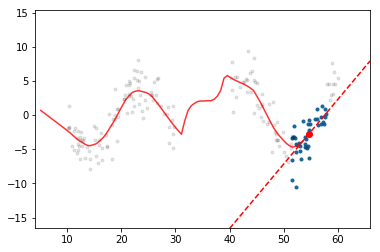

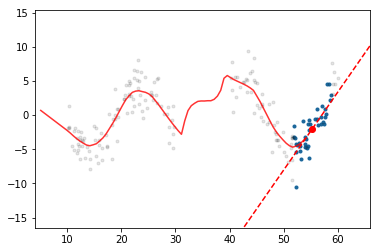

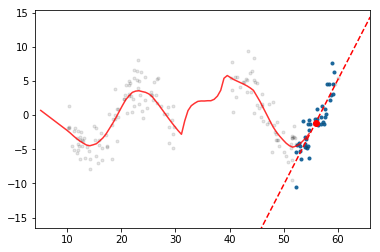

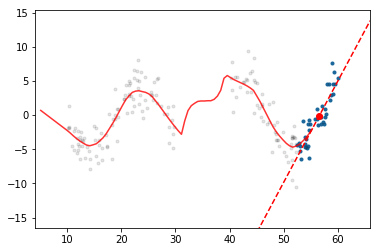

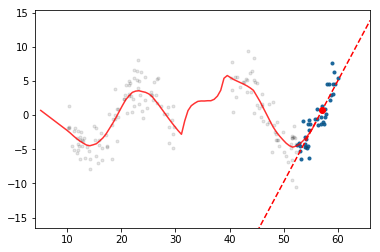

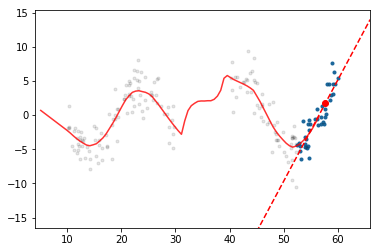

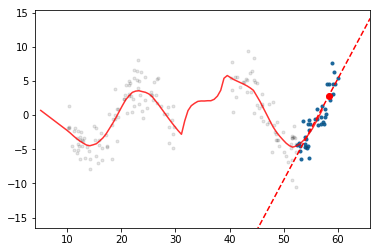

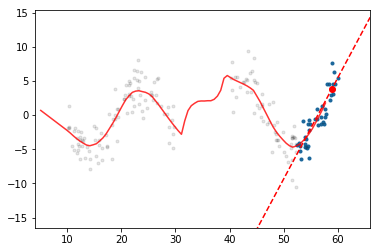

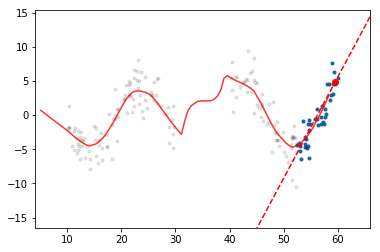

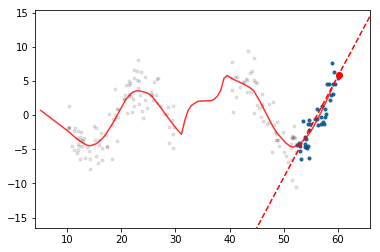

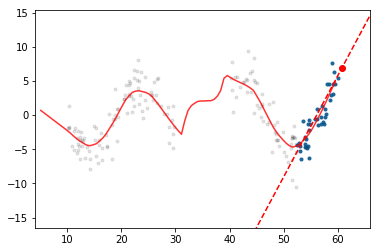

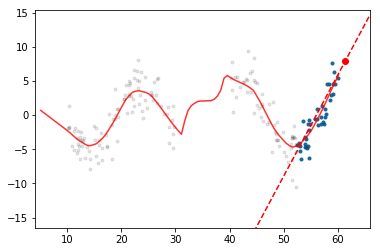

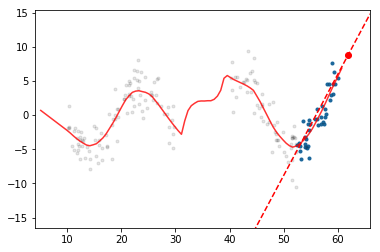

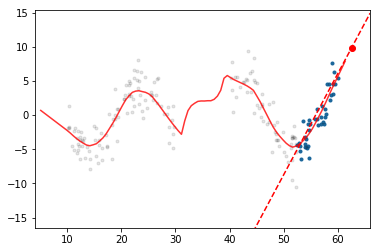

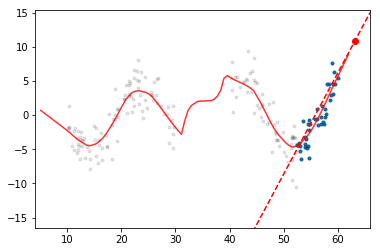

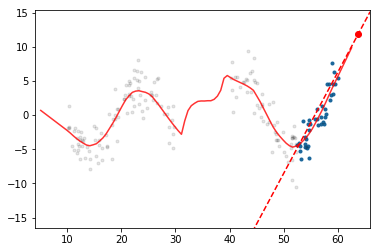

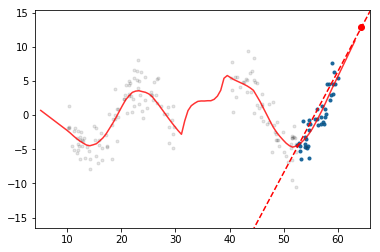

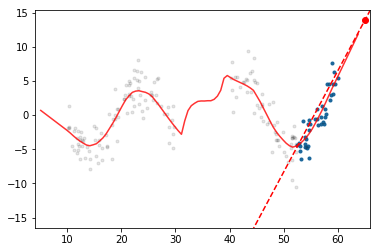

In [11]:
save_figures_path = '' # FILL IN A DIRECTORY FOR SAVING THE FIGURES HERE

for index, x_pred in enumerate(x_preds):
    fig, ax = plt.subplots(1,1)
    ax.set_xlim(left=xs.min()-6, right=xs.max()+6)
    ax.set_ylim(bottom=ys.min()-6, top=ys.max()+6)
    
    x_window = model.xs[indices[index]]
    y_window = model.ys[indices[index]]
    ax.plot(x_window, y_window, '.')
    
    ax.plot(model.xs, model.ys, 'k.', alpha=0.1)
    ax.plot(x_preds[:index-1], y_preds[:index-1], 'r', alpha=0.8)
    ax.plot(x_pred, y_preds[index], 'ro')
    
    coef = LinearRegression().fit(x_window.reshape(-1,1),y_window.reshape(-1,1)).coef_.flatten()
    x_vals = np.array(ax.get_xlim())
    y_vals = y_preds[index] + coef * (x_vals-x_pred)
    ax.plot(x_vals, y_vals, 'r--')

#     fig.savefig(os.path.join(save_figures_path, f'loess_trace_0{index:03}.png'))


# Full plot

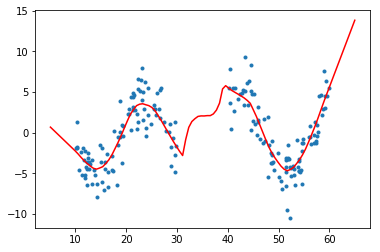

In [8]:
plt.plot(xs,ys,'.')
plt.plot(x_preds,y_preds,'r')